In [21]:
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

random.seed(123)

#using dataset without outliers
df = pd.read_csv('No_Outliers_Spotify.csv')

Populating the interactive namespace from numpy and matplotlib


__Stepwise regression selected the same influential variables for all options (see file stepwise.R):__

instrumentalness + danceability + loudness + energy + acousticness + mode + time_signature


__Applying KNN__ 

To understand the optimal number of neighbors to use when predicting the popularity of a song, the below function plots the accuracy of the classifier using 10-fold cross validation for varying numbers of neighbors

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from patsy import dmatrices


def knn_cv(X_train,y_train):
    nn = [1] + [(x + 1) * 5 for x in range(19)]
    kfold = StratifiedKFold(n_splits=10, shuffle=True) #set up kfold
    score = [] #empty list to contain score 
    for num_neighbors in nn: # Iterate over num_neighbors
        formodel = neighbors.KNeighborsClassifier(n_neighbors=num_neighbors, weights='uniform') #classifier
        scores = cross_val_score(formodel, X_train, y_train, cv=kfold)
        score.append(scores.mean())
    plot(nn, score)
    xlabel('Number of nearest neighbors')
    labels = 'Accuracy of classifier'
    ylabel(labels)
    plt.savefig('knn.jpg',bbox_inches='tight')
    indexbestk = score.index(max(score))
    print("Best K:", nn[indexbestk])

I first split data into training (70%) and test (30%)

In [23]:
Y, X = dmatrices('target ~ 0 + instrumentalness + danceability + loudness + energy + acousticness + C(mode) + time_signature',
                 df,return_type="dataframe")
y = Y['target'].values

X_trainF, X_testF, y_trainF, y_testF = train_test_split(X, y, test_size=0.3, random_state=1)

Next, I apply the above function to identify the optimal number of neighbors

Best K: 20


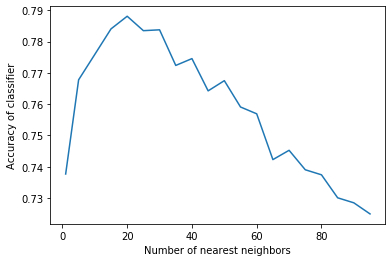

In [24]:
knn_cv(X_trainF,y_trainF)

The ideal K is:  20

Now running to finalize model:

In [25]:
model = neighbors.KNeighborsClassifier(n_neighbors=20,
                                       weights='uniform',
                                       p=2)

In [26]:
model.fit(X_trainF, y_trainF)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [27]:
model.fit(X_trainF, y_trainF)
from sklearn import metrics
prediction_on_training = model.predict(X_trainF)
print("Our model achieved a train accuracy score of: ", (metrics.accuracy_score(y_trainF, prediction_on_training)*100))

predicted_classes = model.predict(X_testF)
print("Our model achieved a test accuracy score of: ", (metrics.accuracy_score(y_testF, predicted_classes))*100)

Our model achieved a train accuracy score of:  80.84644601193706
Our model achieved a test accuracy score of:  80.12658227848102


Our model had about 80% accuracy on both the train and test data sets. 

__Comparing above model using variables selected by stepwise to a model using all variables__

In [28]:
#creating a list of all the variables
var = list(df.columns.values) 
var = var[1:-1]
formula = 'target ~ 0 + ' + " + ".join(var)


In [30]:
Y, X = dmatrices(formula,
                 df,return_type="dataframe")
y = Y['target'].values

#train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Best K: 55


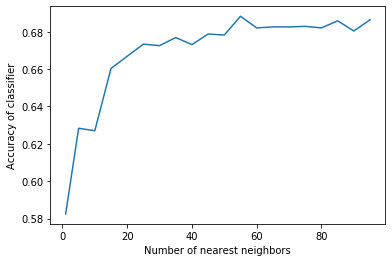

In [31]:
knn_cv(X_train,y_train)

In [32]:
model = neighbors.KNeighborsClassifier(n_neighbors=55,
                                       weights='uniform',p=2)

In [34]:
model.fit(X_train, y_train)

prediction_on_training = model.predict(X_train)

predicted_classes = model.predict(X_test)

print("Our model achieved a train accuracy score of: ", (metrics.accuracy_score(y_train, prediction_on_training)*100))

print("Our model achieved a test accuracy score of: ", (metrics.accuracy_score(y_testF, predicted_classes))*100)

Our model achieved a train accuracy score of:  69.04503526858383
Our model achieved a test accuracy score of:  69.68354430379748


Overall, the model using variables selected by stepwise performed significantly better. 